## Ocean stratification

### loading the modules

In [1]:
%reload_ext autoreload
%autoreload 2 

In [2]:
from aqua.diagnostics.ocean_stratification.stratification import Stratification
from aqua.diagnostics.ocean_stratification import PlotStratification
from aqua.diagnostics.ocean_stratification import PlotMLD


/home/bsc/bsc032946/.conda/envs/aqua/lib/python3.12/site-packages/intake_esm/__init__.py:6: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import DistributionNotFound, get_distribution


### Initalizing the function and process data 

####  Model

In [3]:
strat_model = Stratification(catalog='mn5-phase2', model='IFS-NEMO', exp='control-1990-freeze', source='lra-r100-monthly',
                startdate="01-01-1990", enddate="31-12-1990",
          loglevel='WARNING')

strat_model.run(
    # dim_mean=["lat","lon"],
    outputdir= ".",
    var=['thetao', 'so'],
    region="ls",
    mld = True,  # Set to True to compute MLD, False to skip MLD computation
    climatology = "January"
    )

2025-10-15 16:18:08 :: Regridder :: WARNING  -> Source grid path not found. Please provide a dataset.
2025-10-15 16:18:08 :: Reader :: WARNING  -> Issues in the Regridder() init: trying with data


####  Observation

In [4]:
strat_obs = Stratification(catalog='obs', model='EN4', exp='en4', source='monthly',
                startdate="01-01-1990", enddate="31-12-1990",
          loglevel='WARNING')
strat_obs.run(
    # dim_mean=["lat","lon"],
    outputdir= ".",
    var=['thetao', 'so'],
    region="ls",
    mld = True,  # Set to True to compute MLD, False to skip MLD computation
    climatology = "January"
    )####  model

### Plotting the data

/gpfs/projects/ehpc01/sghosh/AQUA/src/aqua_diagnostics/ocean_stratification/multiple_vertical_line.py:93: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for title


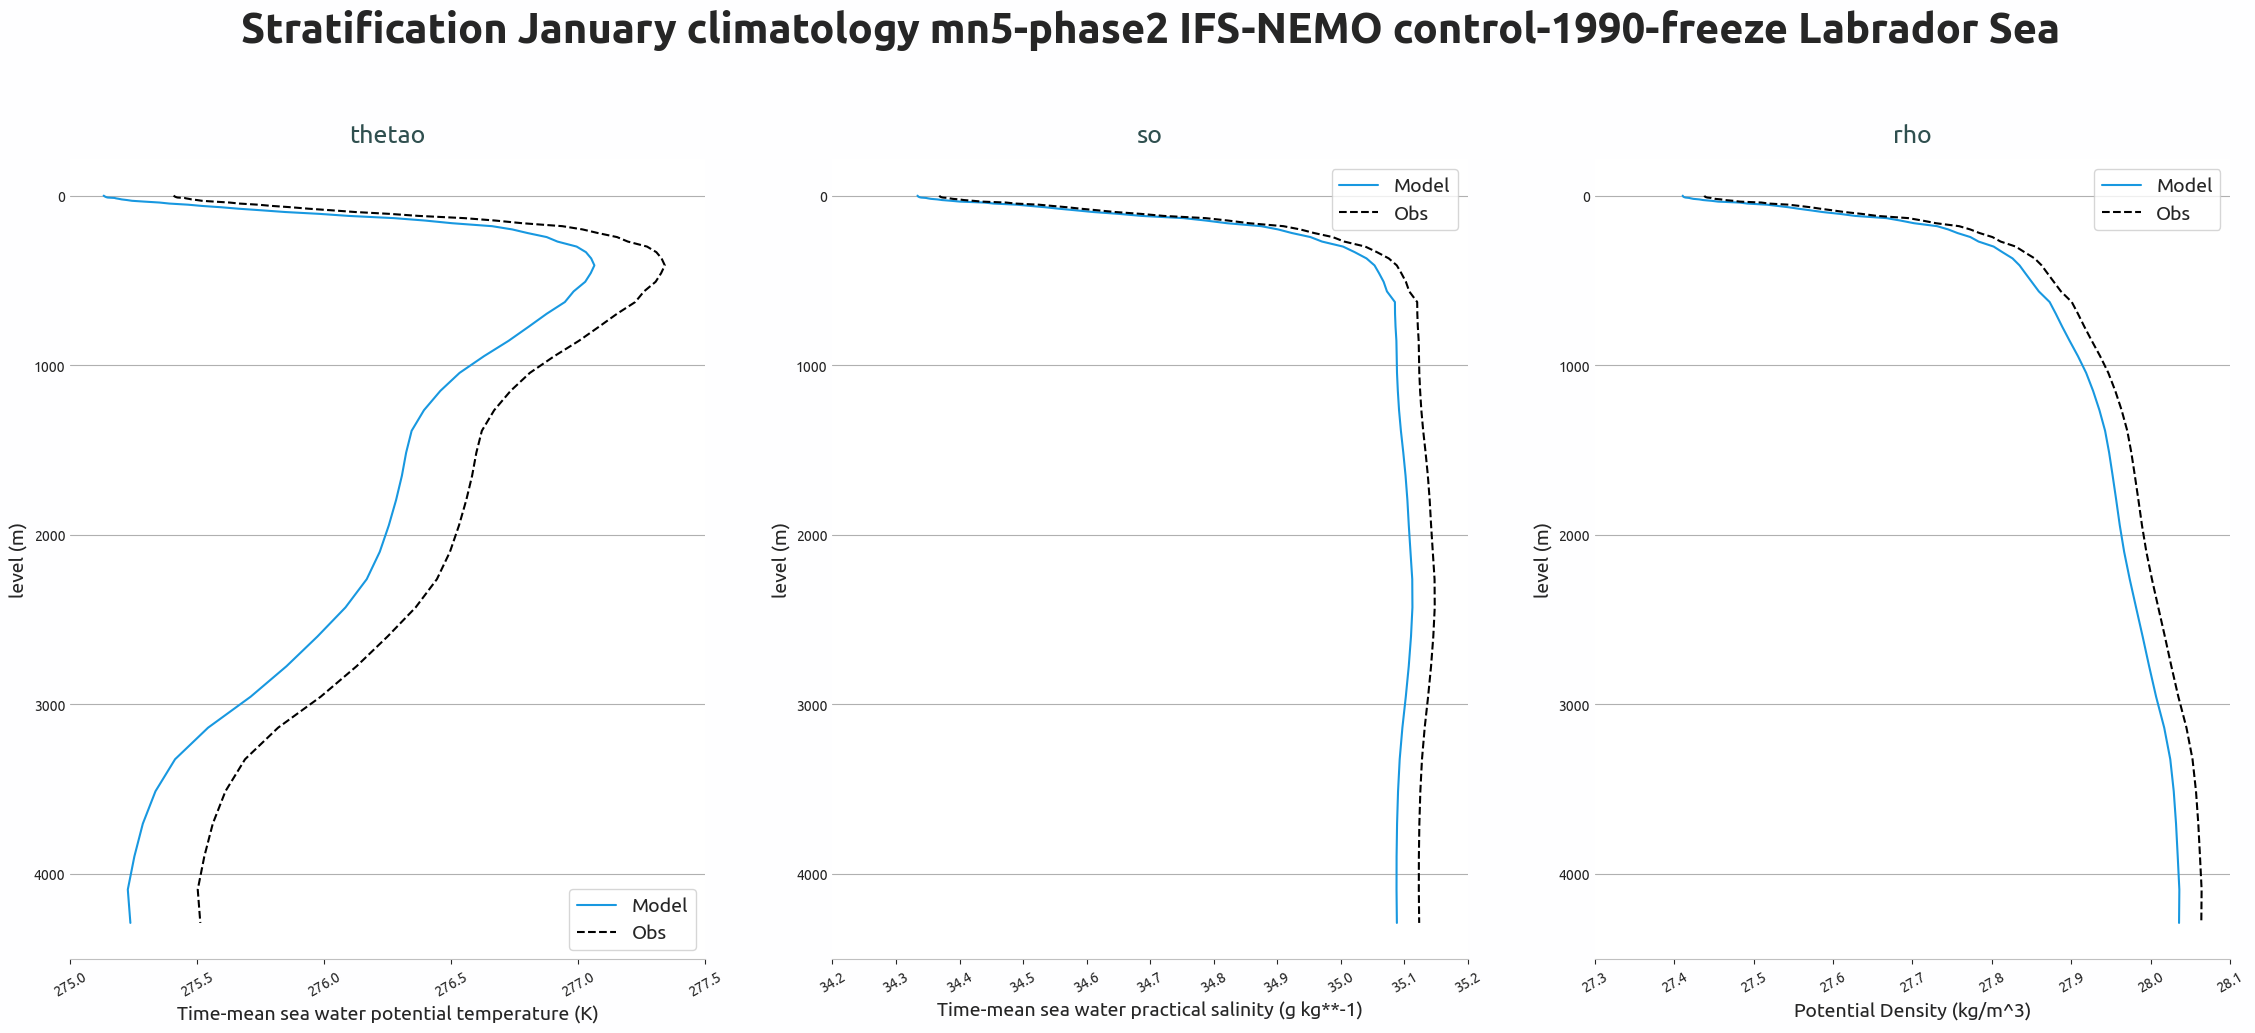

In [6]:
ps = PlotStratification(data=strat_model.data[['thetao', 'so', 'rho']].mean(["lat","lon"]),
                        obs=strat_obs.data[['thetao', 'so', 'rho']].mean(["lat","lon"]),
                        loglevel='WARNING',
                        )
ps.plot_stratification()

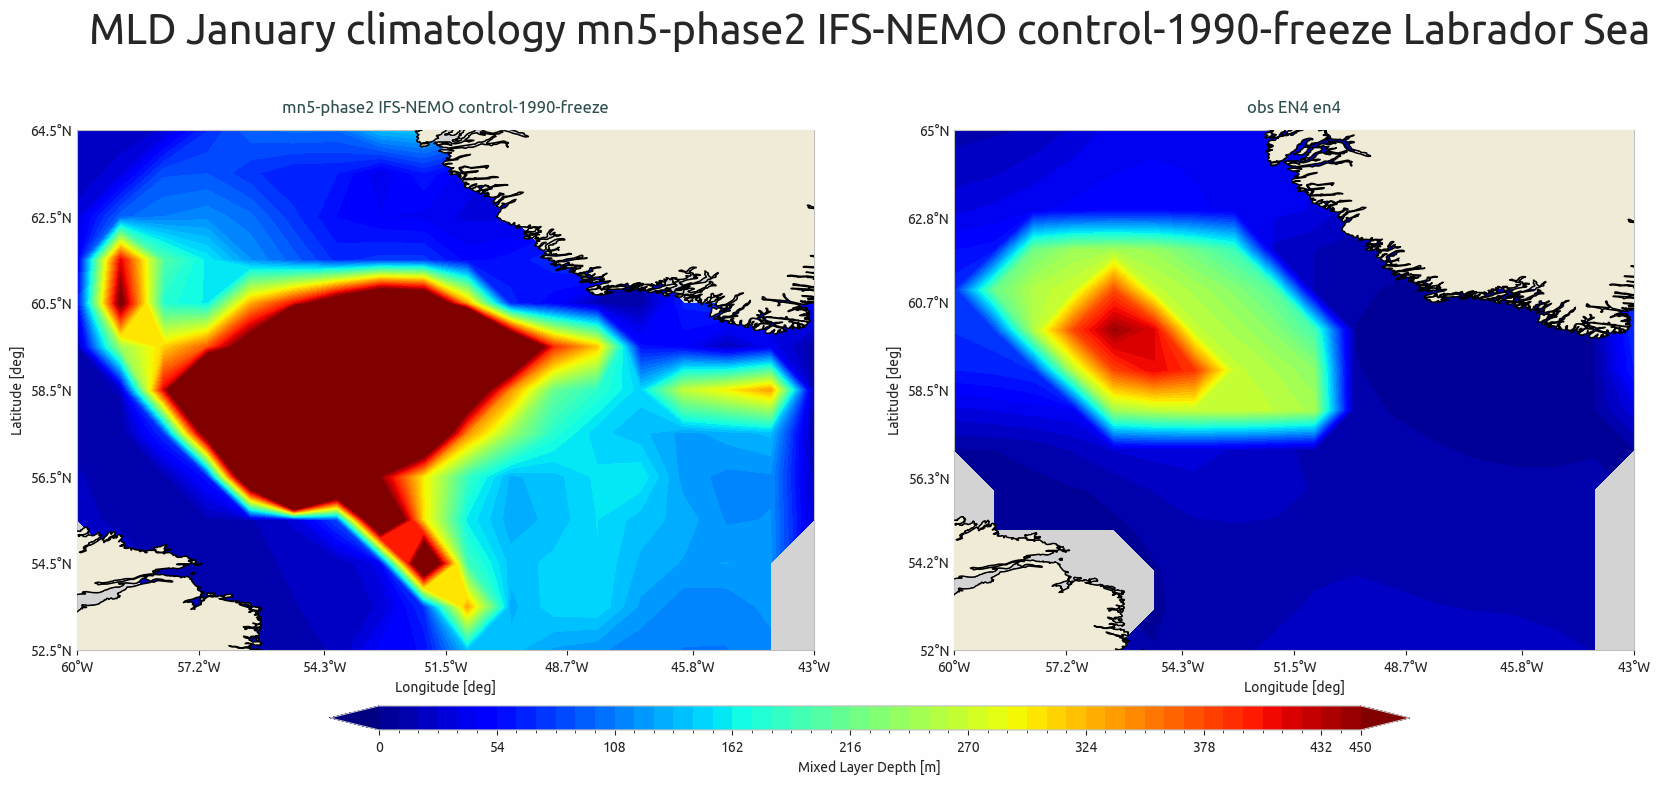

In [7]:
ps = PlotMLD(data=strat_model.data[['mld']],
              obs=strat_obs.data[['mld']],
              loglevel='WARNING',
              )
ps.plot_mld()